In [34]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat
%matplotlib inline

In [30]:
f = open(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\stock.txt')
tickers = f.read().split()
f.close()


tot_growth = []
dt_buy = []
dt_sell = []

for name in tickers:
#   READS CSV FILES AND REVERSES THE ROWS TO START AT THE OLDEST DATE
    hist = pd.read_csv(r'C:\Users\ja_tr\Desktop\DCF DAMODARAN\MACD STUDY\STOCK DATA\\'+ name +' Historical Data.csv')
    hist = hist[::-1].reset_index(drop = True) 
   
    #   CALCULATES THE EMA, MACD AND HISTOGRAM AND APPENDS TO CSV
    df = hist.drop(columns = ['Open', 'Low', 'High', 'Vol.', 'Change %'])
    signal = hist.ta.macd(close='Price', fast=12, slow=26, append=True)

    df['MA12'] = signal['MACD_12_26_9']
    df['MA26'] = signal['MACDs_12_26_9']
    df['MACD'] = signal['MACDh_12_26_9']
    test_d = df.dropna().reset_index(drop=True)

    price = list(test_d["Price"])
    histo = list(test_d["MACD"])

    #   VALUES SET
    d_buy = 0
    d_sell = 0
    is_neg = 0
    growth = []

    if histo[0] < 0:
        is_neg = 1

    for x in range(len(test_d)):
        if is_neg == 1:
            if histo[x] > 0:
                d_buy = price[x]
                is_neg = 0
        else:
            if histo[x] < 0:
                d_sell = price[x]
                is_neg = 1
                growth.append(((d_buy / d_sell)-1)*100)
    tot_growth.extend(growth)

In [31]:
# REMOVAL OF OUTLIERS
elements = np.array(tot_growth)

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in tot_growth if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

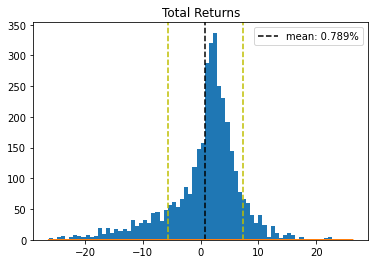

1.904761904761909

In [35]:
plt.hist(final_list, bins='auto')
sd = stat.stdev(final_list)
m = stat.mean(final_list)
plt.axvline(m, color = 'k', linestyle = 'dashed', label = 'mean: ' + str(round(np.mean(final_list), 3)) + '%')
plt.axvline(m + sd, color = 'y', linestyle = 'dashed')
plt.axvline(m - sd, color = 'y', linestyle = 'dashed')
plt.title("Total Returns")
plt.label()

plt.legend()
plt.show()
np.median(final_list)